In [9]:
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from docx import Document

# Load evaluated word list
evaluated_words = pd.read_csv("word_list_for_evaluation.csv")
dictionary_words = evaluated_words[evaluated_words["eval"] == 1]["word"].tolist()

# Load GloVe model
glove_path = "C:/Users/Administrator/Desktop/MAN7916/local_data/glove.6B.100d.txt"
print("Loading GloVe model...")
model = gensim.models.KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
print("GloVe model loaded.")

# Get word vectors for dictionary words
word_vectors = np.array([model[word] for word in dictionary_words if word in model])
words_filtered = [word for word in dictionary_words if word in model]
labels = [word for word in dictionary_words if word in model]


# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors)

Loading GloVe model...
GloVe model loaded.


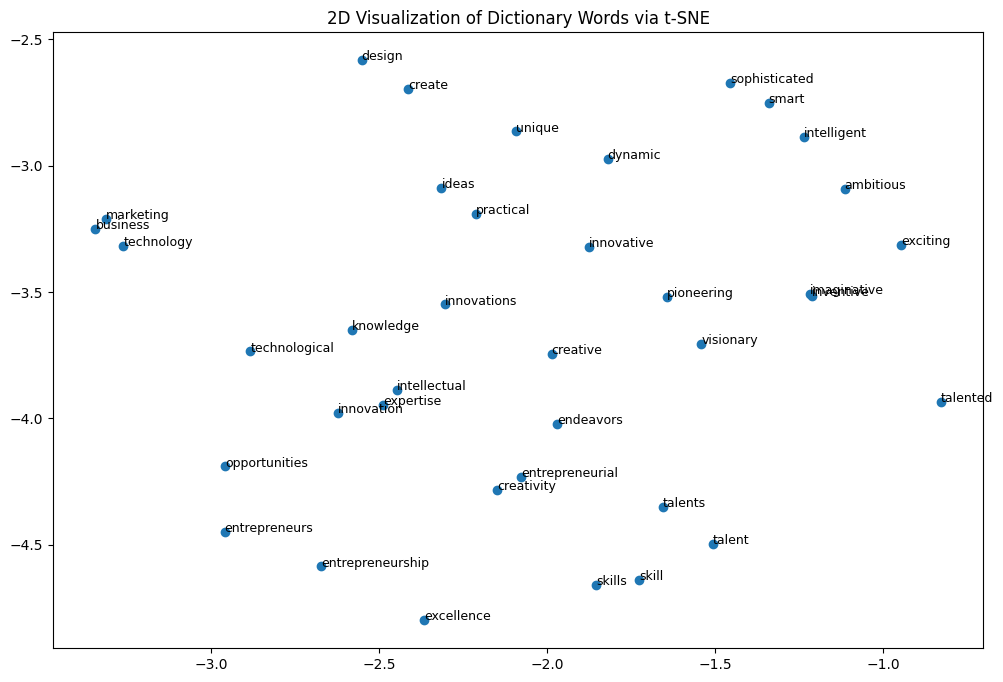

Analysis complete. Results saved in word_embedding_results.docx and dictionary_embedding_plot.jpg.


In [11]:
# Plot words in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')
for i, word in enumerate(labels):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9)
plt.title("2D Visualization of Dictionary Words via t-SNE")
plt.savefig("dictionary_embedding_plot.jpg")
plt.show()

# Save plot to Word document
doc = Document("word_embedding_results.docx")
doc.add_page_break()
doc.add_heading("2D Visualization of Dictionary Words", level=1)
doc.add_paragraph("The following plot shows the 2D projection of dictionary words using t-SNE:")
doc.add_picture("dictionary_embedding_plot.jpg", width=doc.sections[0].page_width * 0.8)

doc.save("word_embedding_results.docx")
print("Analysis complete. Results saved in word_embedding_results.docx and dictionary_embedding_plot.jpg.")
